# SVM Classifier Example

Importing libraries

In [12]:
from sklearn.datasets._samples_generator import make_blobs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

Creating clusters

In [55]:
X, y = make_blobs(n_samples=200, centers=2, cluster_std=0.95, random_state=0)

In [56]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=20, random_state=0)

Executing and plotting scatter map

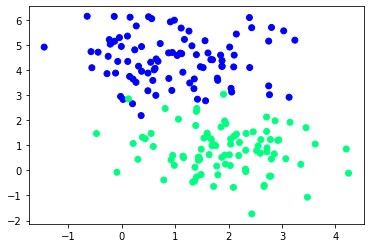

In [57]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

In [58]:
svc = SVC(kernel='linear')
svc.fit(train_X, train_y)

SVC(kernel='linear')

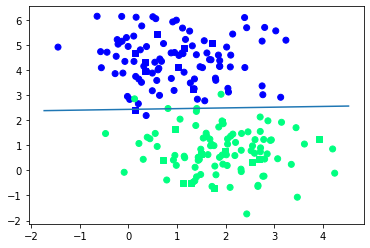

In [59]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

ax = plt.gca()
xlim = ax.get_xlim()

ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='winter', marker='s')

w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - (svc.intercept_[0] / w[1])
plt.plot(xx,yy)
plt.show()

In [60]:
pred_y = svc.predict(test_X)
confusion_matrix(test_y, pred_y)

array([[ 8,  1],
       [ 0, 11]], dtype=int64)

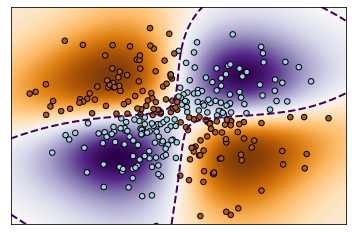

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()